In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('air_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9357 non-null   int64  
 1   CO(GT)        9357 non-null   float64
 2   C6H6(GT)      9357 non-null   float64
 3   NOx(GT)       9357 non-null   float64
 4   PT08.S3(NOx)  9357 non-null   float64
 5   NO2(GT)       9357 non-null   float64
 6   T             9357 non-null   float64
 7   RH            9357 non-null   float64
 8   weekend       9357 non-null   int64  
 9   PT08_feat     9357 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 731.1 KB


In [4]:
df.describe()

,Unnamed: 0,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,weekend,PT08_feat
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,4678.000000,-4.387203,9.761680,168.605536,833.786263,103.434438,17.982294,48.851309,0.287272,1127.383115
std,2701.277568,14.027700,7.474419,257.427995,251.865233,48.631623,8.814727,17.079489,0.452514,274.459534
min,0.000000,-34.207524,0.100000,-200.000000,322.000000,2.000000,-1.900000,9.200000,0.000000,469.500000
25%,2339.000000,0.600000,4.000000,50.000000,666.000000,58.135834,10.900000,36.600000,0.000000,930.750000
50%,4678.000000,1.500000,7.900000,141.000000,794.871754,96.000000,17.200000,48.600000,0.000000,1079.000000
75%,7017.000000,2.600000,13.600000,284.000000,960.000000,133.000000,24.100000,61.900000,1.000000,1290.000000
max,9356.000000,11.900000,63.700000,1479.000000,2683.000000,340.000000,44.600000,88.700000,1.000000,2265.500000


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

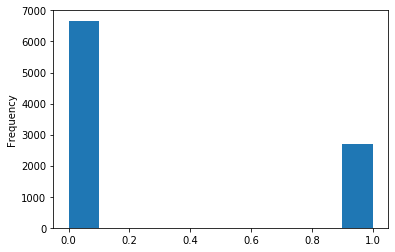

In [6]:
df['weekend'].plot(kind = 'hist')

## DATA PARTITIONING

In [7]:
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

scaler = StandardScaler()
scaler.fit(X)
print('1', X)
X = scaler.transform(X)
print('2',X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

1 [[   1.5    11.3   180.   ...   27.4    31.5  1186.5 ]
 [   2.     13.    310.   ...   35.     17.3  1148.75]
 [   1.4     7.5   180.   ...   24.9    28.3  1024.5 ]
 ...
 [   2.1     6.4   295.   ...    5.7    59.9  1079.75]
 [   1.7     5.2   222.   ...    5.6    59.7  1024.5 ]
 [   2.2     7.9   299.   ...   12.5    32.3  1042.  ]]
2 [[ 0.41970658  0.2058223   0.04426509 ...  1.06846298 -1.01596928
   0.21540532]
 [ 0.45535224  0.43327687  0.54928766 ...  1.93070256 -1.84742031
   0.07785493]
 [ 0.41257744 -0.30260557  0.04426509 ...  0.78483154 -1.20333852
  -0.37487717]
 ...
 [ 0.46248138 -0.44978205  0.49101582 ... -1.39345793  0.64693279
  -0.17356169]
 [ 0.43396484 -0.61033822  0.20742623 ... -1.40480319  0.63522221
  -0.37487717]
 [ 0.46961051 -0.24908684  0.50655498 ... -0.62198041 -0.96912697
  -0.31111209]]


In [8]:
X_train.shape

(6549, 8)

In [9]:
a = pd.DataFrame(X_train)

In [10]:
a.describe()

,0,1,2,3,4,5,6,7
count,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000,6549.000000
mean,0.003358,-0.007154,-0.004293,0.006861,-0.000019,0.000009,0.001799,-0.005419
std,0.995941,0.995422,0.997891,1.007429,0.999577,1.002701,1.000027,0.998444
min,-2.125930,-1.292702,-1.431955,-2.032093,-2.085883,-2.255698,-2.321699,-2.388943
25%,0.355544,-0.770894,-0.456873,-0.658269,-0.931514,-0.814850,-0.729060,-0.720120
50%,0.419707,-0.249087,-0.107242,-0.150034,-0.152881,-0.100099,-0.014715,-0.175384
75%,0.498127,0.500175,0.444398,0.497172,0.607982,0.694069,0.769894,0.571579
max,1.161136,5.664732,5.090606,7.342469,4.864699,3.019847,2.333256,4.146978


## VARIANCE THRESHOLD

In [11]:
#se non ho capito male questo metodo elimina gli attributi che hanno la deviazione standard al di sotto di una determinata  
#soglia che gli passo io

In [12]:
#faccio un primo tentativo tenendo solo le 3 colonne che hanno una varianza pazzesca

In [13]:
sel = VarianceThreshold(threshold=(0.99990110))
X_train_sel = sel.fit_transform(X_train)

X_train_sel.shape

(6549, 3)

In [14]:
sel.variances_

array([0.9917468 , 0.99071425, 0.99563448, 1.01475785, 0.99900155,
       1.00525555, 0.99990111, 0.99673909])

In [15]:
## ORA APPLICO GRIDSEARCH PER L'APPLICAZIONE DI UN ALGORITMO DI CLASSIFICATION PASSANDOGLI COMUNQUE I BEST PARAMETERSù

In [16]:
varianze = [0.9917468 , 0.99071425, 0.99563448, 1.01475785, 0.99900155,
       1.00525555, 0.99990111, 0.99673909]

### GRIDSEARCH

In [17]:
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]
min_sample_leaf = [1,2,3]
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid_dt = GridSearchCV(estimator = decisiontree,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

In [18]:
grid_dt.fit(X_train_sel, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [19]:
best = grid_dt.best_estimator_

## APPLICAZIONE DECISION TREE



Accuracy 0.7154558404558404
F1-score [0.83274021 0.0476758 ]
              precision    recall  f1-score   support

           0       0.72      0.99      0.83      2001
           1       0.62      0.02      0.05       807

    accuracy                           0.72      2808
   macro avg       0.67      0.51      0.44      2808
weighted avg       0.69      0.72      0.61      2808

[[1989   12]
 [ 787   20]]


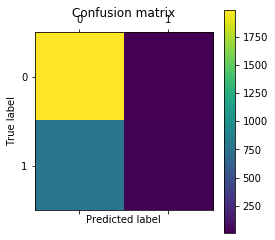

In [21]:
X_test_sel = sel.transform(X_test)
best.fit(X_train_sel, y_train)

y_pred = best.predict(X_test_sel)

print("\n")
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

NameError: name 'feature_names' is not defined

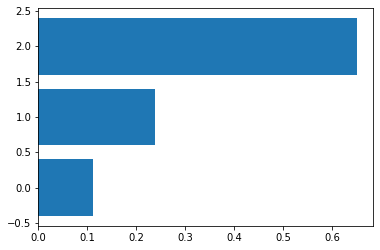

In [25]:
nbr_features = 15

tree_feature_importances = best.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]


y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Decision Tree Feature Importance")
plt.show()

In [26]:
# roc curve

In [29]:
y_score = best.predict_proba(X_test_sel)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

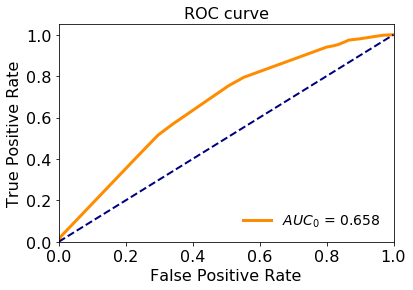

In [30]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [31]:
#lift chart

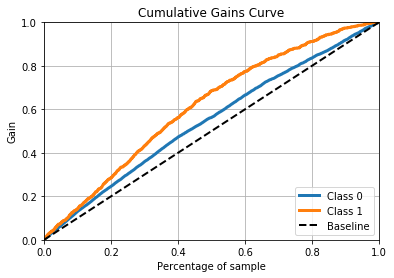

In [32]:
plot_cumulative_gain(y_test, y_score)
plt.show()

## UNIVARIATE FEATURE SELECTION

In [33]:
sel = SelectKBest(k=4)
X_train_sel = sel.fit_transform(X_train, y_train)

X_train_sel.shape

(6549, 4)

In [34]:
#GRIDSEARCH

In [35]:
grid_dt = GridSearchCV(estimator = decisiontree,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

In [36]:
grid_dt.fit(X_train_sel, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [37]:
best_dt = grid_dt.best_estimator_

In [38]:
X_test_sel = sel.transform(X_test)

best_dt.fit(X_train_sel, y_train)

y_pred = best_dt.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.709045584045584
F1-score [0.8238085  0.16547497]
              precision    recall  f1-score   support

           0       0.72      0.95      0.82      2001
           1       0.47      0.10      0.17       807

    accuracy                           0.71      2808
   macro avg       0.60      0.53      0.49      2808
weighted avg       0.65      0.71      0.63      2808



In [39]:
##AGGIUNGENDO UNA QUARTA VARIABILE IL RISULTATO MIGLIORA DIBRUTTO. provo a capire di che variabile di tratta. 

In [40]:
'''for i in df:
    print(i, df[str(i)].min(), df[str(i)].max())
prima_colonna = []
for i in X_train_sel:
    prima_colonna.append(i[3])
x = 0
b = 10000
for i in prima_colonna:
    if i > x:
        x = i
    if i < b:
        b = i
print(x, b)'''

'for i in df:\n    print(i, df[str(i)].min(), df[str(i)].max())\nprima_colonna = []\nfor i in X_train_sel:\n    prima_colonna.append(i[3])\nx = 0\nb = 10000\nfor i in prima_colonna:\n    if i > x:\n        x = i\n    if i < b:\n        b = i\nprint(x, b)'

In [41]:
#PROBABILMENTE LA VARIABILE CHE SI AGGIUNGE è PT08_feat

In [42]:
#roc curve

In [43]:
y_score = best_dt.predict_proba(X_test_sel)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

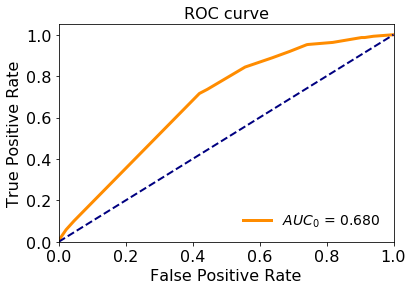

In [44]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [45]:
#lift chart

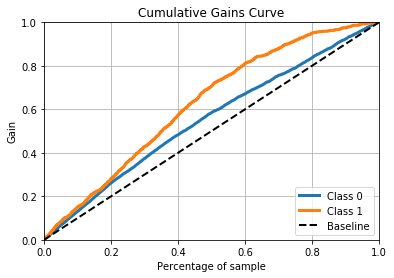

In [46]:
plot_cumulative_gain(y_test, y_score)
plt.show()

## RECURSIVE FEATURES ELIMINATION

In [47]:
# RICARICO IL DATASET E RIFACCIO LA PARTIZIONE PERCHE' TESTANDO SU UN NOTEBOOK A PARTE
#I RISULTATI CAMBIANO PROBABILMENTE PERCHE' IL DECISION TREE E' GIA' FITTATO

In [48]:
df = pd.read_csv('air_dataset.csv')

In [49]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [50]:
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [51]:
# NON RIESCO A DARE SENSO ALLA THRESHOLD

In [52]:
sel = SelectFromModel(DecisionTreeClassifier(), threshold = 0.120)

In [53]:
X_train_sel = sel.fit_transform(X_train, y_train)
X_train_sel.shape

(6549, 5)

In [54]:
X_test_sel = sel.transform(X_test)
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf.fit(X_train_sel, y_train)

y_pred = clf.predict(X_test_sel)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7108262108262108
F1-score [0.82409012 0.188     ]
              precision    recall  f1-score   support

           0       0.73      0.95      0.82      2001
           1       0.49      0.12      0.19       807

    accuracy                           0.71      2808
   macro avg       0.61      0.53      0.51      2808
weighted avg       0.66      0.71      0.64      2808



[[1902   99]
 [ 713   94]]


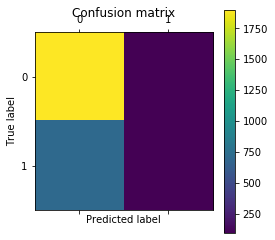

In [55]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

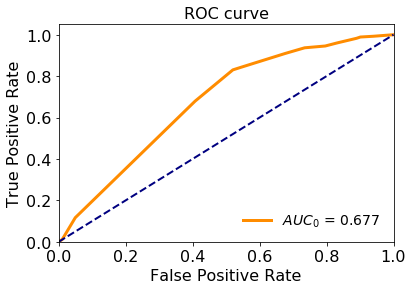

In [56]:
y_score = clf.predict_proba(X_test_sel)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

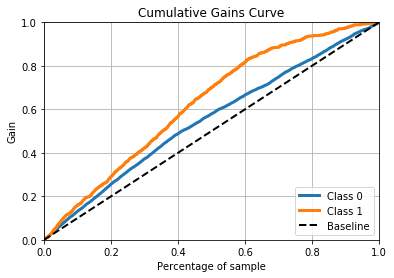

In [57]:
plot_cumulative_gain(y_test, y_score)
plt.show()

## PCA

In [58]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [59]:
X_train_pca.shape

(6549, 2)

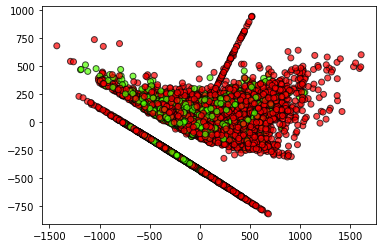

In [60]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [61]:
print("Test shape %s" % Counter(y_test))

Test shape Counter({0: 2001, 1: 807})


In [62]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, ))

Accuracy 0.7118945868945868
F1-score [0.83170377 0.        ]
              precision    recall  f1-score   support

           0       0.71      1.00      0.83      2001
           1       0.00      0.00      0.00       807

    accuracy                           0.71      2808
   macro avg       0.36      0.50      0.42      2808
weighted avg       0.51      0.71      0.59      2808



[[1999    2]
 [ 807    0]]


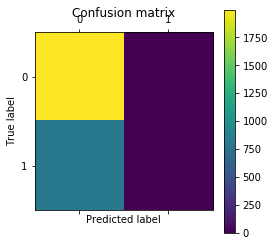

In [63]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

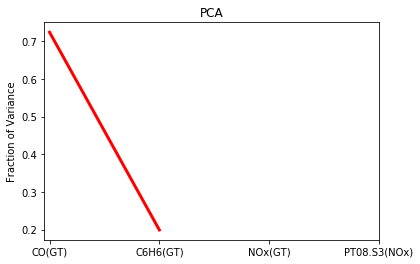

In [64]:
plt.plot(PCA(n_components=2).fit(X_train).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(4), df.columns)
plt.show()

# IMBALANCED

In [65]:
#SBILANCIO PER CLASSE 1 (4% DEI RECORD == 1)

In [66]:
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

In [67]:
df.weekend.value_counts()

0    6669
1    2688
Name: weekend, dtype: int64

In [68]:
rows2remove = np.random.choice(df[df[class_name] == 1].index, 2422, replace=False)

In [69]:
len(df), len(rows2remove)

(9357, 2422)

In [70]:
df2 = df.drop(index=rows2remove, axis=0)
print(len(df2))

6935


In [71]:
df2.weekend.value_counts()

0    6669
1     266
Name: weekend, dtype: int64

In [72]:
attributes = [col for col in df2.columns if col != class_name]
X = df2[attributes].values
y = df2[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [73]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1], dtype=int64), array([4668,  186], dtype=int64)),
 (array([0, 1], dtype=int64), array([2001,   80], dtype=int64)))

In [74]:
#GRIDSEARCH

In [75]:
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]
min_sample_leaf = [1,2,3]
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid_dt_imbalanced = GridSearchCV(estimator = decisiontree,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_dt_imbalanced.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6935 entries, 0 to 9356
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO(GT)        6935 non-null   float64
 1   C6H6(GT)      6935 non-null   float64
 2   NOx(GT)       6935 non-null   float64
 3   PT08.S3(NOx)  6935 non-null   float64
 4   NO2(GT)       6935 non-null   float64
 5   T             6935 non-null   float64
 6   RH            6935 non-null   float64
 7   weekend       6935 non-null   int64  
 8   PT08_feat     6935 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 541.8 KB


In [77]:
best_imb_dt = grid_dt_imbalanced.best_estimator_

In [78]:
print('Test set shape %s' % Counter(y_test))

Test set shape Counter({0: 2001, 1: 80})


Accuracy 0.9615569437770303
F1-score [0.98040176 0.        ]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2001
           1       1.00      0.00      0.00        80

    accuracy                           0.96      2081
   macro avg       0.98      0.50      0.49      2081
weighted avg       0.96      0.96      0.94      2081

[[2001    0]
 [  80    0]]


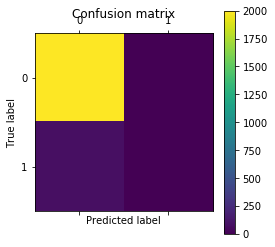

In [79]:
best_imb_dt.fit(X_train, y_train)

y_pred = best_imb_dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, zero_division = 1))
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

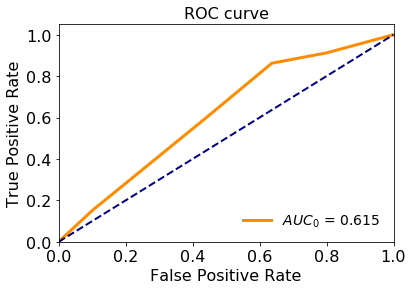

In [80]:
y_score = best_imb_dt.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

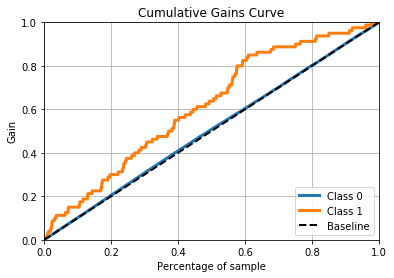

In [81]:
plot_cumulative_gain(y_test, y_score)
plt.show()

In [82]:
# SBILANCIO PER LA CLASSE 0

In [83]:
df.weekend.value_counts()

0    6669
1    2688
Name: weekend, dtype: int64

In [84]:
rows2remove = np.random.choice(df[df[class_name] == 0].index, 6561, replace=False)

In [85]:
len(df), len(rows2remove)

(9357, 6561)

In [86]:
df2 = df.drop(index=rows2remove, axis=0)
print(len(df2))

2796


In [87]:
df2.weekend.value_counts()

1    2688
0     108
Name: weekend, dtype: int64

In [88]:
print('Dataset shape %s' % Counter(df2[class_name]))

Dataset shape Counter({1: 2688, 0: 108})


In [89]:
attributes = [col for col in df2.columns if col != class_name]
X = df2[attributes].values
y = df2[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [90]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1], dtype=int64), array([  76, 1881], dtype=int64)),
 (array([0, 1], dtype=int64), array([ 32, 807], dtype=int64)))

In [91]:
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]
min_sample_leaf = [1,2,3]
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid_dt_imbalanced = GridSearchCV(estimator = decisiontree,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_dt_imbalanced.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [92]:
best_imb_dt = grid_dt_imbalanced.best_estimator_

In [93]:
print('Test set shape %s' % Counter(y_test))

Test set shape Counter({1: 807, 0: 32})


Accuracy 0.9606674612634089
F1-score [0.15384615 0.97986577]
              precision    recall  f1-score   support

           0       0.43      0.09      0.15        32
           1       0.97      1.00      0.98       807

    accuracy                           0.96       839
   macro avg       0.70      0.54      0.57       839
weighted avg       0.94      0.96      0.95       839

[[  3  29]
 [  4 803]]


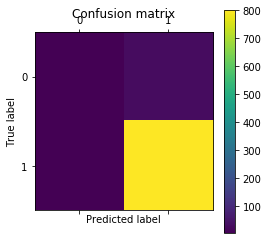

In [94]:
best_imb_dt.fit(X_train, y_train)

y_pred = best_imb_dt.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, zero_division = 1))
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

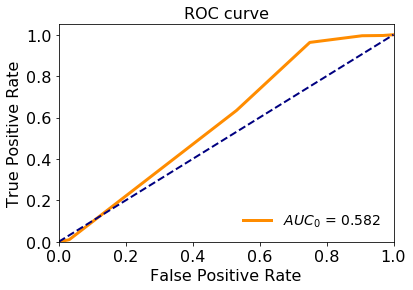

In [95]:
y_score = best_imb_dt.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

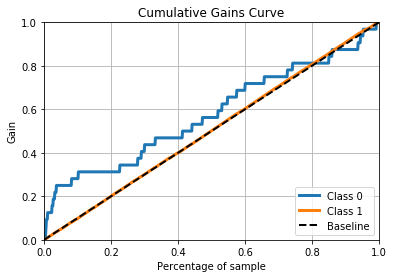

In [96]:
plot_cumulative_gain(y_test, y_score)
plt.show()

## ADJUST THE DECISION THRESHOLD

In [97]:
# NON HO LA PIU' PALLIDA IDEA DI COSA SIA QUESTO CODICE... MAGARI SAREBBE UNA COSA DA CHIEDERE A GUIDOTTI... 
#CIOE'.. A CHE SERVE?

Accuracy 0.9463647199046484
F1-score [0.11764706 0.97234173]
              precision    recall  f1-score   support

           0       0.16      0.09      0.12        32
           1       0.96      0.98      0.97       807

    accuracy                           0.95       839
   macro avg       0.56      0.54      0.54       839
weighted avg       0.93      0.95      0.94       839



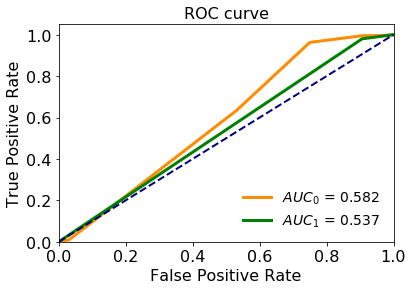

[[  3  29]
 [ 16 791]]


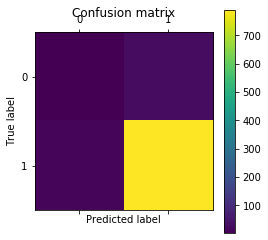

In [98]:
clf = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best')
clf.fit(X_train, y_train)

def adjusted_predict(X, thr=0.5):
    y_score = clf.predict_proba(X_test)[:, 1]
    return np.array([1 if y > thr else 0 for y in y_score])

y_pred = adjusted_predict(X_test, thr=0.5)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [99]:
a = np.arange(0.0, 5.5, 0.5)
a

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

[[  3  29]
 [ 16 791]]


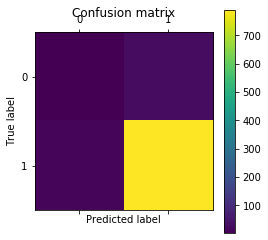

[[  3  29]
 [ 16 791]]


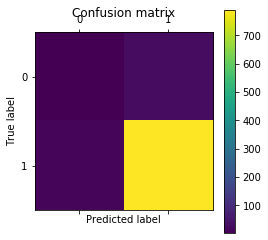

[[ 32   0]
 [807   0]]


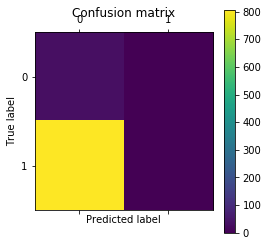

[[ 32   0]
 [807   0]]


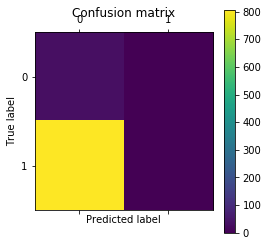

[[ 32   0]
 [807   0]]


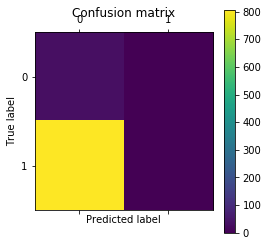

[[ 32   0]
 [807   0]]


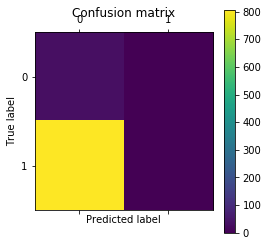

[[ 32   0]
 [807   0]]


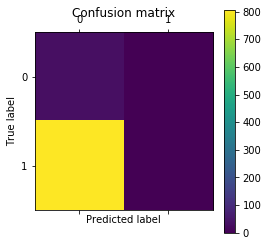

[[ 32   0]
 [807   0]]


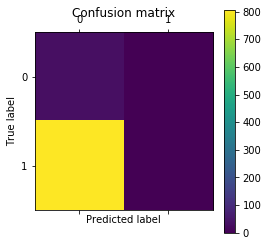

[[ 32   0]
 [807   0]]


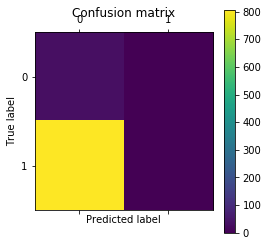

[[ 32   0]
 [807   0]]


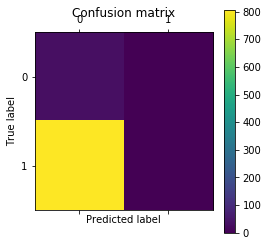

[[ 32   0]
 [807   0]]


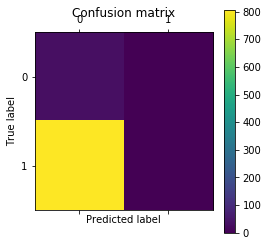

In [100]:
for i in a:
    def adjusted_predict(X, thr=i):
        y_score = clf.predict_proba(X_test)[:, 1]
        return np.array([1 if y > thr else 0 for y in y_score])

    y_pred = adjusted_predict(X_test, thr=i)

    #print('Accuracy %s' % accuracy_score(y_test, y_pred))
    #print('F1-score %s' % f1_score(y_test, y_pred, average=None))
    #print(classification_report(y_test, y_pred))

    #y_score = clf.predict_proba(X_test)
    #fpr, tpr, thr = roc_curve(y_test, y_score[:, 1])
    #roc_auc = auc(fpr, tpr)

    #plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
    #plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

    #plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    #plt.xlabel('False Positive Rate', fontsize=16)
    #plt.ylabel('True Positive Rate', fontsize=16)
    #plt.title('ROC curve', fontsize=16)
    #plt.legend(loc="lower right", fontsize=14, frameon=False)
    #plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.show()
    cm=confusion_matrix(y_test, y_pred)
    print(cm)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [101]:
## sostanzialmente cambiando sta threshold cambia il modo in cui vengono predetti i valori. però rimane basilarmente una merda

# UNDERSAMPLING

In [102]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour

Using TensorFlow backend.


### RandomUnderSampling

In [103]:
df = pd.read_csv('air_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [104]:
df.weekend.value_counts()

0    6669
1    2688
Name: weekend, dtype: int64

In [105]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 1881, 1: 1881})


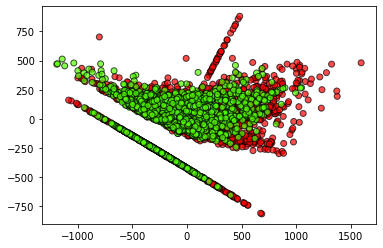

In [106]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [107]:
len(X_pca)

3762

In [108]:
y_res.shape

(3762,)

In [112]:
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid = GridSearchCV(estimator = decisiontree,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid = grid.fit(X_pca, y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.1s finished


In [113]:
X_pca.shape

(3762, 2)

In [114]:
best = grid.best_estimator_

In [115]:
len(y_pred), len(y_res)

(839, 3762)

In [116]:
#QUESTO CODICE HO DOVUTO SISTEMARLO. NON HO IDEA DELLA CONGRUENZA DEL CODICE PERO' GIRA

Accuracy 0.6339712918660287
F1-score [0.61352793 0.65236052]
              precision    recall  f1-score   support

           0       0.65      0.58      0.61      1881
           1       0.62      0.69      0.65      1881

    accuracy                           0.63      3762
   macro avg       0.64      0.63      0.63      3762
weighted avg       0.64      0.63      0.63      3762



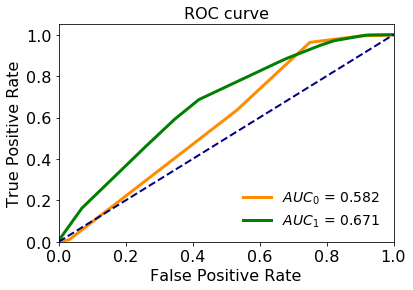

In [117]:
best.fit(X_pca, y_res)

y_pred = best.predict(X_pca)

print('Accuracy %s' % accuracy_score(y_res, y_pred))
print('F1-score %s' % f1_score(y_res, y_pred, average=None))
print(classification_report(y_res, y_pred))

y_score = best.predict_proba(X_pca)
fpr, tpr, _ = roc_curve(y_res, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

### CondensedNearestNeighbour

In [216]:
import warnings
warnings.simplefilter("ignore")

In [219]:
df = pd.read_csv('air_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

Resampled dataset shape Counter({1: 1881, 0: 1680})


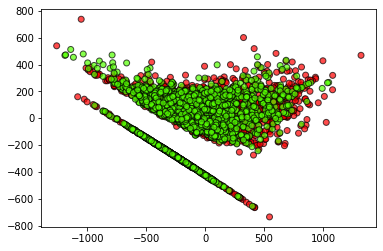

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.7s finished


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator'

In [120]:
cnn = CondensedNearestNeighbour(random_state=42, n_jobs=10)
X_res, y_res = cnn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]

parameters = dict(decisiontree__criterion=criterion,
                          decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid = GridSearchCV(estimator = decisiontree,
                            param_grid = params,
                            scoring = 'accuracy',
                            cv = 5, 
                            verbose = 1,
                            n_jobs = -1)
grid = grid.fit(X_pca, y_res)


Accuracy 0.6114672364672364
F1-score [0.679212   0.50744921]
              precision    recall  f1-score   support

           0       0.82      0.58      0.68      2001
           1       0.40      0.70      0.51       807

    accuracy                           0.61      2808
   macro avg       0.61      0.64      0.59      2808
weighted avg       0.70      0.61      0.63      2808



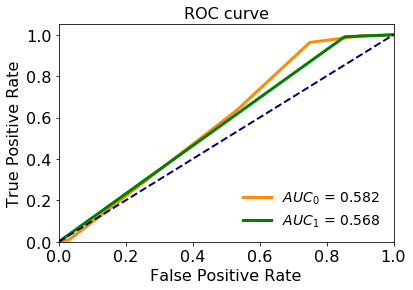

In [121]:
best = grid.best_estimator_
best.fit(X_res, y_res)

y_pred = best.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

[[1155  846]
 [ 245  562]]


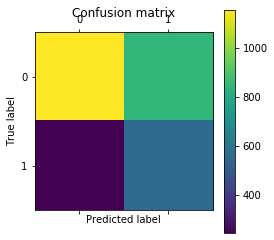

In [122]:
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

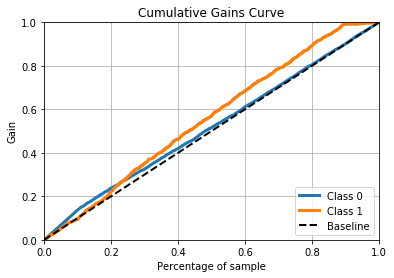

In [123]:
plot_cumulative_gain(y_test, y_score)
plt.show()

# CLASS WEIGHT

In [124]:
## questo sinceramente penso sia semplicemente un altro modo per sbilanciare le classi.. 
#cioè semplicemente un'altra tecninca per farlo

Accuracy 0.728988603988604
F1-score [0.8223208  0.42910728]
              precision    recall  f1-score   support

           0       0.77      0.88      0.82      2001
           1       0.54      0.35      0.43       807

    accuracy                           0.73      2808
   macro avg       0.66      0.62      0.63      2808
weighted avg       0.71      0.73      0.71      2808



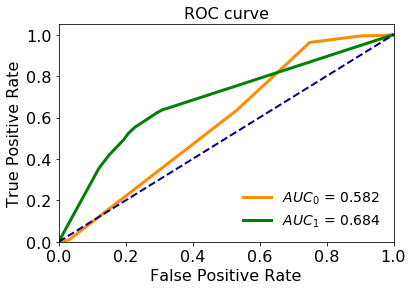

[[1761  240]
 [ 521  286]]


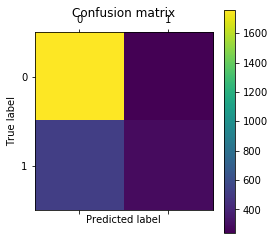

In [125]:
df = pd.read_csv('air_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

clf = DecisionTreeClassifier(min_samples_leaf=3, class_weight={0:5, 1: 0.5}, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Meta-Cost Sensitive Classifier

In [126]:
from costcla.models import CostSensitiveDecisionTreeClassifier
from costcla.metrics import savings_score

C:\Users\Ale\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Ale\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
C:\Users\Ale\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / fu

In [127]:
df = pd.read_csv('air_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [210]:
cost = [0, 0.5, 0, 0]
cost_mat = np.array([cost] * len(X_train))
cost_mat.shape

(6549, 4)

In [211]:
X_train.shape

(6549, 8)

In [212]:
cost_mat

array([[0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       ...,
       [0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0. ],
       [0. , 0.5, 0. , 0. ]])

Accuracy 0.28739316239316237
F1-score [0.         0.44647303]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2001
           1       0.29      1.00      0.45       807

    accuracy                           0.29      2808
   macro avg       0.14      0.50      0.22      2808
weighted avg       0.08      0.29      0.13      2808



C:\Users\Ale\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


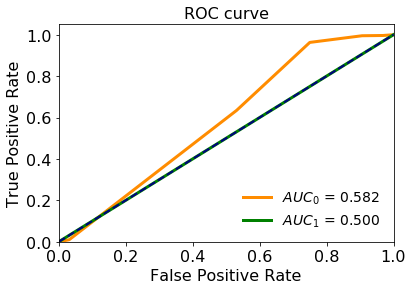

[[   0 2001]
 [   0  807]]


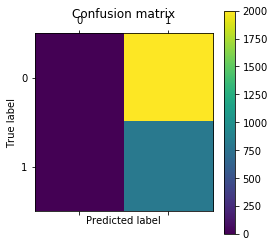

In [213]:
clf = CostSensitiveDecisionTreeClassifier()
clf.fit(X_train, y_train, cost_mat)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()
cm=confusion_matrix(y_test, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# NON NE SALTO FUORI

In [214]:
cost_mat_test = np.array([cost] * len(X_test))
print(savings_score(y_test, y_pred, cost_mat_test))

nan


C:\Users\Ale\anaconda3\lib\site-packages\costcla\metrics\costs.py:143: RuntimeWarning: invalid value encountered in double_scalars
  return 1.0 - cost / cost_base


# Oversampling

In [215]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

### Random Oversampling

In [225]:
df = pd.read_csv('air_dataset.csv')
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
class_name = 'weekend'
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CO(GT)        9357 non-null   float64
 1   C6H6(GT)      9357 non-null   float64
 2   NOx(GT)       9357 non-null   float64
 3   PT08.S3(NOx)  9357 non-null   float64
 4   NO2(GT)       9357 non-null   float64
 5   T             9357 non-null   float64
 6   RH            9357 non-null   float64
 7   weekend       9357 non-null   int64  
 8   PT08_feat     9357 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 658.0 KB


In [227]:
len(df), len(X_train)

(9357, 6549)

In [228]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4668, 1: 4668})


In [229]:
## NON CAPISCO PERCHE' NONOSTANTE IL RESAMPLING VENGA FATTO SUL TRAIN (70% DEI RECORD), 
#IL TOTALE DEI RECORD DEL RESAMPLED DATASET RIMANE INVARIATO RISPETTO AL DF ORIGINALE

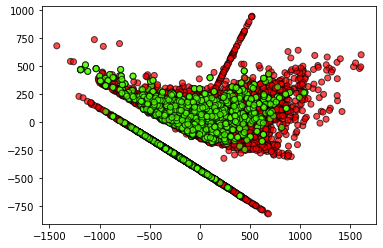

In [230]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [231]:
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]

parameters = dict(decisiontree__criterion=criterion,
                          decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid = GridSearchCV(estimator = decisiontree,
                            param_grid = params,
                            scoring = 'accuracy',
                            cv = 5, 
                            verbose = 1,
                            n_jobs = -1)
grid = grid.fit(X_pca, y_res)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.9s finished


In [ ]:
best = grid.best_estimator_

Accuracy 0.6308911739502999
F1-score [0.63999164 0.62131868]
              precision    recall  f1-score   support

           0       0.62      0.66      0.64      4668
           1       0.64      0.61      0.62      4668

    accuracy                           0.63      9336
   macro avg       0.63      0.63      0.63      9336
weighted avg       0.63      0.63      0.63      9336



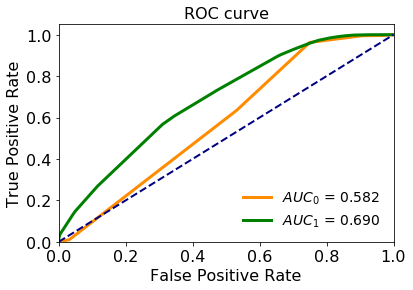

In [233]:
best.fit(X_pca, y_res)

y_pred = best.predict(X_pca)

print('Accuracy %s' % accuracy_score(y_res, y_pred))
print('F1-score %s' % f1_score(y_res, y_pred, average=None))
print(classification_report(y_res, y_pred))

y_score = best.predict_proba(X_pca)
fpr, tpr, _ = roc_curve(y_res, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

[[3063 1605]
 [1841 2827]]


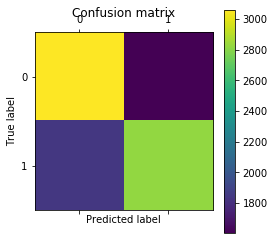

In [235]:
cm=confusion_matrix(y_res, y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

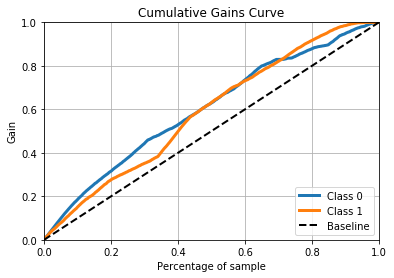

In [237]:
plot_cumulative_gain(y_res, y_score)
plt.show()

## SMOTE

In [238]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4668, 1: 4668})


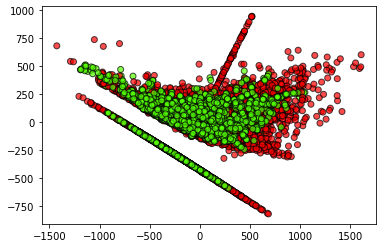

In [239]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_pca = pca.transform(X_res)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_res, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

Accuracy 0.6958689458689459
F1-score [0.77852697 0.51477273]
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      2001
           1       0.48      0.56      0.51       807

    accuracy                           0.70      2808
   macro avg       0.64      0.66      0.65      2808
weighted avg       0.71      0.70      0.70      2808



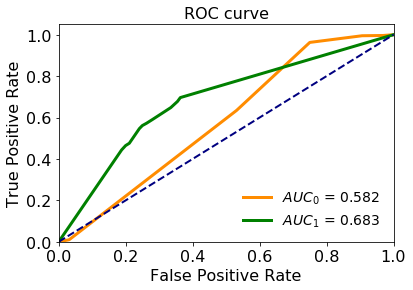

In [240]:
clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_res, y_res)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

y_score = clf.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))
plt.plot(fpr, tpr, color='green', lw=3, label='$AUC_1$ = %.3f' % (roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# SCIKITPLOT

In [241]:
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain
from scikitplot.metrics import plot_lift_curve

In [242]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)
decisiontree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [4,6,8,10,12]
min_sample_leaf = [1,2,3]
parameters = dict(decisiontree__criterion=criterion,
                      decisiontree__max_depth=max_depth)

params = {'criterion' : ['gini', 'entropy'],'max_depth': max_depth}
grid = GridSearchCV(estimator = decisiontree,
                        param_grid = params,
                        scoring = 'accuracy',
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)
grid_search = grid.fit(X_train, y_train)
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

y_pred = best_clf.predict(X_test)
y_score = best_clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy 0.7165242165242165
F1-score [0.82136445 0.3137931 ]
              precision    recall  f1-score   support

           0       0.75      0.91      0.82      2001
           1       0.52      0.23      0.31       807

    accuracy                           0.72      2808
   macro avg       0.63      0.57      0.57      2808
weighted avg       0.68      0.72      0.68      2808



[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.2s finished


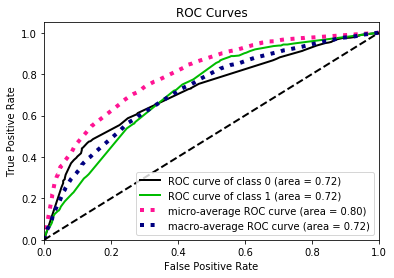

In [243]:
plot_roc(y_test, y_score)
plt.show()

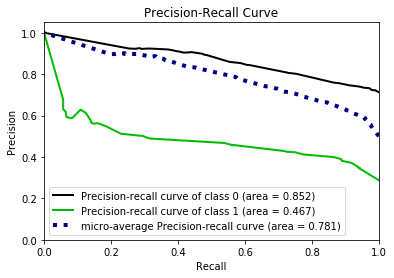

In [244]:
plot_precision_recall(y_test, y_score)
plt.show()

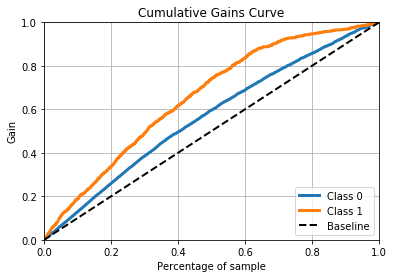

In [245]:
plot_cumulative_gain(y_test, y_score)
plt.show()

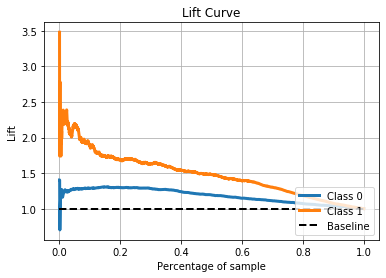

In [246]:
plot_lift_curve(y_test, y_score)
plt.show()